In [37]:
import sys
from pathlib import Path

sys.path.append(str(Path("..").resolve()))
sys.path.append(str(Path("../..").resolve()))

from src.data_ingestion import *
from src.data_preprocessing import *


from pyspark.sql import DataFrame
from pyspark.sql.functions import col
from pyspark.sql.types import NumericType, StringType
from pyspark.sql import functions as F

from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

import seaborn as sns

import numpy as np

from itertools import combinations

from scipy import stats

import matplotlib.pyplot as plt

import pandas as pd



In [ ]:
model_save_paths = {
    "Logistic Regression": "./logistic_regression_model",
    "Random Forest": "./random_forest_model",
    "Gradient-Boosted Trees": "./gbt_model",
    "Decision Tree": "./decision_tree_model",
}

for name, model in fitted_models.items():
    model.save(model_save_paths[name])


Py4JJavaError: An error occurred while calling o1981.save.
: java.lang.RuntimeException: java.io.FileNotFoundException: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset. -see https://wiki.apache.org/hadoop/WindowsProblems
	at org.apache.hadoop.util.Shell.getWinUtilsPath(Shell.java:735)
	at org.apache.hadoop.util.Shell.getSetPermissionCommand(Shell.java:270)
	at org.apache.hadoop.util.Shell.getSetPermissionCommand(Shell.java:286)
	at org.apache.hadoop.fs.RawLocalFileSystem.setPermission(RawLocalFileSystem.java:978)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkOneDirWithMode(RawLocalFileSystem.java:660)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:700)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:672)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:699)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:672)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:699)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:672)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:699)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:672)
	at org.apache.hadoop.fs.ChecksumFileSystem.mkdirs(ChecksumFileSystem.java:788)
	at org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter.setupJob(FileOutputCommitter.java:356)
	at org.apache.hadoop.mapred.FileOutputCommitter.setupJob(FileOutputCommitter.java:131)
	at org.apache.hadoop.mapred.OutputCommitter.setupJob(OutputCommitter.java:265)
	at org.apache.spark.internal.io.HadoopMapReduceCommitProtocol.setupJob(HadoopMapReduceCommitProtocol.scala:188)
	at org.apache.spark.internal.io.SparkHadoopWriter$.write(SparkHadoopWriter.scala:79)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopDataset$1(PairRDDFunctions.scala:1091)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopDataset(PairRDDFunctions.scala:1089)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$4(PairRDDFunctions.scala:1062)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:1027)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$3(PairRDDFunctions.scala:1009)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:1008)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$2(PairRDDFunctions.scala:965)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:963)
	at org.apache.spark.rdd.RDD.$anonfun$saveAsTextFile$2(RDD.scala:1623)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.saveAsTextFile(RDD.scala:1623)
	at org.apache.spark.rdd.RDD.$anonfun$saveAsTextFile$1(RDD.scala:1609)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.saveAsTextFile(RDD.scala:1609)
	at org.apache.spark.ml.util.DefaultParamsWriter$.saveMetadata(ReadWrite.scala:413)
	at org.apache.spark.ml.classification.LogisticRegressionModel$LogisticRegressionModelWriter.saveImpl(LogisticRegression.scala:1311)
	at org.apache.spark.ml.util.MLWriter.save(ReadWrite.scala:168)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)
Caused by: java.io.FileNotFoundException: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset. -see https://wiki.apache.org/hadoop/WindowsProblems
	at org.apache.hadoop.util.Shell.fileNotFoundException(Shell.java:547)
	at org.apache.hadoop.util.Shell.getHadoopHomeDir(Shell.java:568)
	at org.apache.hadoop.util.Shell.getQualifiedBin(Shell.java:591)
	at org.apache.hadoop.util.Shell.<clinit>(Shell.java:688)
	at org.apache.hadoop.util.StringUtils.<clinit>(StringUtils.java:79)
	at org.apache.hadoop.conf.Configuration.getTimeDurationHelper(Configuration.java:1907)
	at org.apache.hadoop.conf.Configuration.getTimeDuration(Configuration.java:1867)
	at org.apache.hadoop.conf.Configuration.getTimeDuration(Configuration.java:1840)
	at org.apache.hadoop.util.ShutdownHookManager.getShutdownTimeout(ShutdownHookManager.java:183)
	at org.apache.hadoop.util.ShutdownHookManager$HookEntry.<init>(ShutdownHookManager.java:207)
	at org.apache.hadoop.util.ShutdownHookManager.addShutdownHook(ShutdownHookManager.java:304)
	at org.apache.spark.util.SparkShutdownHookManager.install(ShutdownHookManager.scala:181)
	at org.apache.spark.util.ShutdownHookManager$.shutdownHooks$lzycompute(ShutdownHookManager.scala:50)
	at org.apache.spark.util.ShutdownHookManager$.shutdownHooks(ShutdownHookManager.scala:48)
	at org.apache.spark.util.ShutdownHookManager$.addShutdownHook(ShutdownHookManager.scala:153)
	at org.apache.spark.util.ShutdownHookManager$.<init>(ShutdownHookManager.scala:58)
	at org.apache.spark.util.ShutdownHookManager$.<clinit>(ShutdownHookManager.scala)
	at org.apache.spark.util.Utils$.createTempDir(Utils.scala:242)
	at org.apache.spark.util.SparkFileUtils.createTempDir(SparkFileUtils.scala:103)
	at org.apache.spark.util.SparkFileUtils.createTempDir$(SparkFileUtils.scala:102)
	at org.apache.spark.util.Utils$.createTempDir(Utils.scala:94)
	at org.apache.spark.deploy.SparkSubmit.prepareSubmitEnvironment(SparkSubmit.scala:377)
	at org.apache.spark.deploy.SparkSubmit.org$apache$spark$deploy$SparkSubmit$$runMain(SparkSubmit.scala:969)
	at org.apache.spark.deploy.SparkSubmit.doRunMain$1(SparkSubmit.scala:199)
	at org.apache.spark.deploy.SparkSubmit.submit(SparkSubmit.scala:222)
	at org.apache.spark.deploy.SparkSubmit.doSubmit(SparkSubmit.scala:91)
	at org.apache.spark.deploy.SparkSubmit$$anon$2.doSubmit(SparkSubmit.scala:1125)
	at org.apache.spark.deploy.SparkSubmit$.main(SparkSubmit.scala:1134)
	at org.apache.spark.deploy.SparkSubmit.main(SparkSubmit.scala)
Caused by: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset.
	at org.apache.hadoop.util.Shell.checkHadoopHomeInner(Shell.java:467)
	at org.apache.hadoop.util.Shell.checkHadoopHome(Shell.java:438)
	at org.apache.hadoop.util.Shell.<clinit>(Shell.java:515)
	... 25 more


In [38]:
spark = init_spark()
df = load_data(spark, "../../data/US_Accidents_March23.csv")
df.printSchema()
# df.show(5)  

root
 |-- ID: string (nullable = true)
 |-- Source: string (nullable = true)
 |-- Severity: integer (nullable = true)
 |-- Start_Time: timestamp (nullable = true)
 |-- End_Time: timestamp (nullable = true)
 |-- Start_Lat: double (nullable = true)
 |-- Start_Lng: double (nullable = true)
 |-- End_Lat: double (nullable = true)
 |-- End_Lng: double (nullable = true)
 |-- Distance(mi): double (nullable = true)
 |-- Description: string (nullable = true)
 |-- Street: string (nullable = true)
 |-- City: string (nullable = true)
 |-- County: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Zipcode: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Timezone: string (nullable = true)
 |-- Airport_Code: string (nullable = true)
 |-- Weather_Timestamp: timestamp (nullable = true)
 |-- Temperature(F): double (nullable = true)
 |-- Wind_Chill(F): double (nullable = true)
 |-- Humidity(%): double (nullable = true)
 |-- Pressure(in): double (nullable = true)
 |-- V

In [39]:
# missing_values = check_missing_values(df)

## Cleaning Data

In [40]:
# df = cast_columns(df)
# df = drop_high_missing_columns(df)
# df = impute_missing_values(df)
# df.cache()

In [41]:
# df.describe().show()

In [42]:
# missing_values = check_missing_values(df)

## Feature Engineering 


In [43]:
from pyspark.sql.functions import col

def convert_temp_to_celsius(df, temp_col="Temperature(F)", new_col="Temperature(C)"):
    return df.withColumn(new_col, (col(temp_col) - 32) * 5 / 9)

df = convert_temp_to_celsius(df)

## Decriptive Analysis

### Weather Analysis

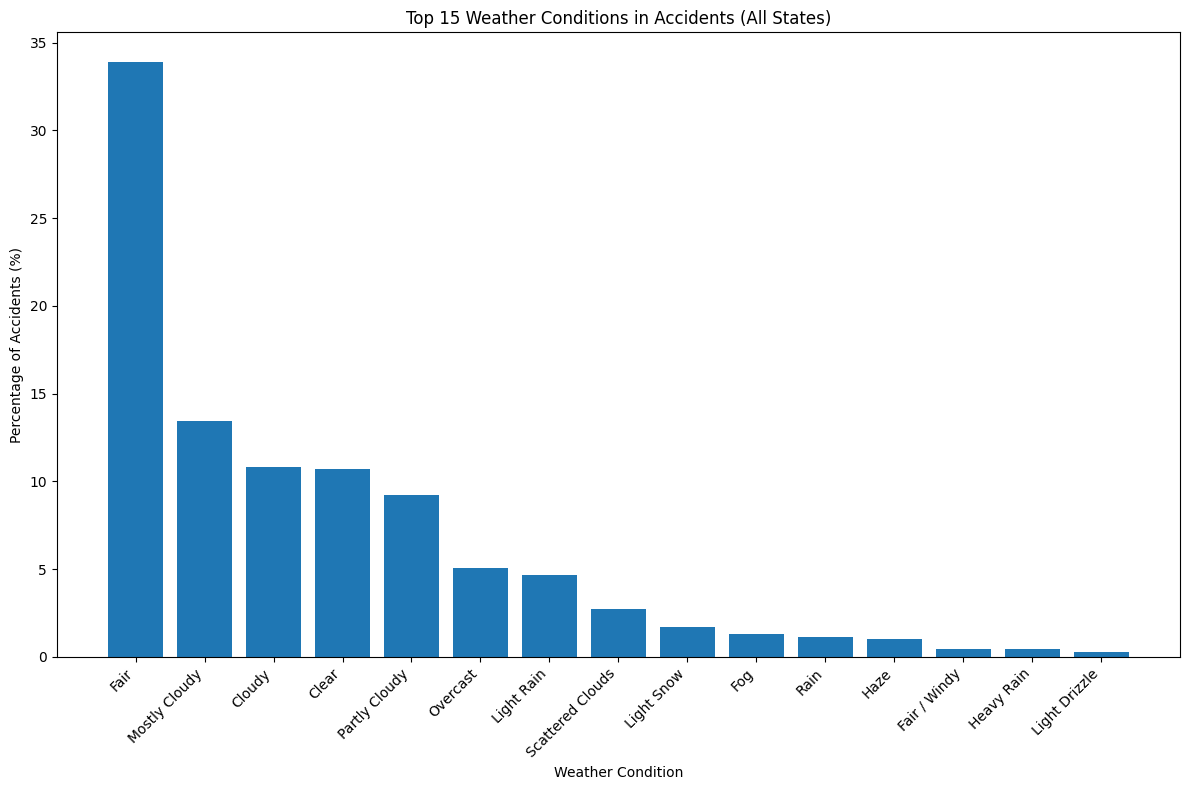

In [44]:
# Filter rows with non-null Weather_Condition and count total accidents in one step
total_accidents = df.filter(F.col("Weather_Condition").isNotNull()).count()

# Group by Weather_Condition, calculate counts and percentages, and limit to top N
top_weather_df = (
    df.filter(F.col("Weather_Condition").isNotNull())
    .groupBy("Weather_Condition")
    .agg(F.count("*").alias("count"))
    .withColumn("percentage", (F.col("count") / total_accidents) * 100)
    .orderBy(F.col("count").desc())  # Order by count descending
    .limit(weather_condition_to_consider)  # Limit to top N
    .toPandas()  # Convert to Pandas for plotting
)

# Plot
plt.figure(figsize=(12, 8))
plt.bar(top_weather_df["Weather_Condition"], top_weather_df["percentage"])
plt.title(f"Top {weather_condition_to_consider} Weather Conditions in Accidents (All States)")
plt.xlabel("Weather Condition")
plt.ylabel("Percentage of Accidents (%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()



### 🚨 Key Insights:

1. **Fair weather dominates accident scenes**:
   - **~34%** of all accidents occurred under *"Fair"* conditions — implying that good visibility and dry roads don't prevent accidents.
   - This suggests **driver behavior** (distraction, speeding) may be a more critical factor than weather in many cases.

2. **Cloud-related conditions contribute significantly**:
   - Combined conditions like *"Mostly Cloudy"*, *"Cloudy"*, *"Partly Cloudy"*, and *"Overcast"* account for **~39%** of accidents.
   - Overcast skies might reduce visibility or affect driver alertness, but aren't as severe as storms.

3. **Rain & snow are less dominant but still relevant**:
   - *"Light Rain"*, *"Rain"*, *"Heavy Rain"*, *"Light Snow"*, and *"Light Drizzle"* collectively contribute **~11%**.
   - Though dangerous, these conditions likely cause drivers to be more cautious, reducing total accident count despite higher risk per mile.

4. **Rare conditions still matter**:
   - Categories like *"Fog"*, *"Haze"*, and *"Scattered Clouds"* represent smaller shares, but could be disproportionately dangerous — worth investigating in severity analysis.

---


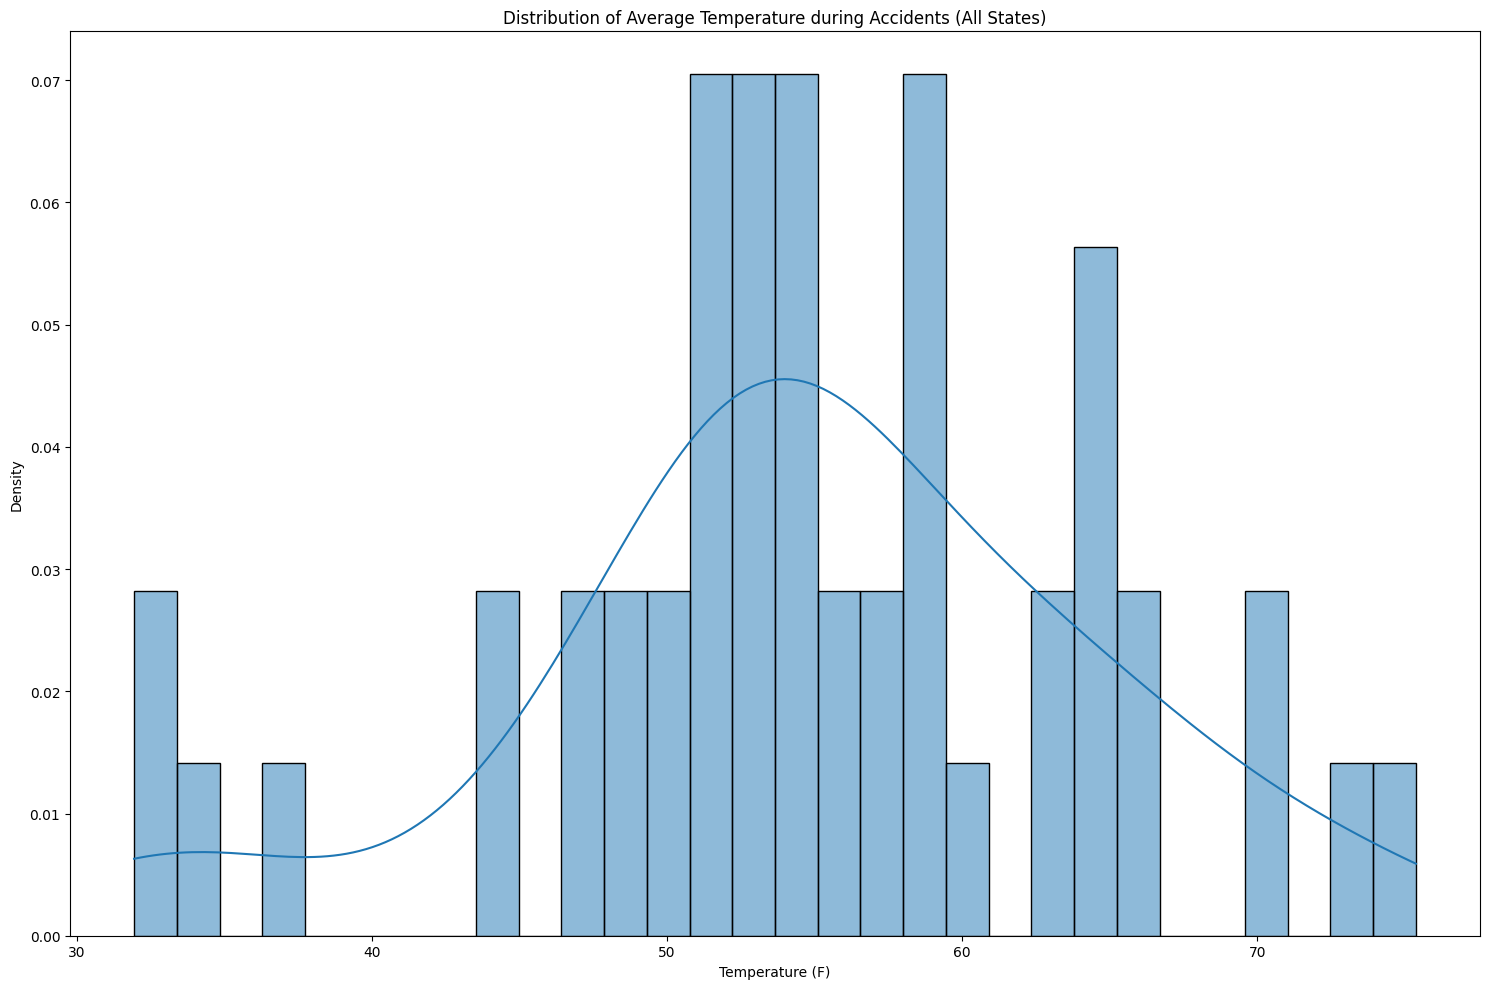

In [45]:
# Aggregating average temperature by state
aggregated_temperatures = df.groupBy("State").agg(F.avg("Temperature(F)").alias("avg_temperature"))
result = aggregated_temperatures.collect()  # Collect aggregated results  

# Extract average temperatures for plotting
avg_temperatures = [row['avg_temperature'] for row in result]

# Plotting the temperature distribution for all states combined
plt.figure(figsize=(15, 10))

# Plot the histogram and KDE for average temperatures
sns.histplot(avg_temperatures, kde=True, bins=30, stat='density')

plt.title('Distribution of Average Temperature during Accidents (All States)')
plt.xlabel('Temperature (F)')
plt.ylabel('Density')
plt.tight_layout()

plt.show()

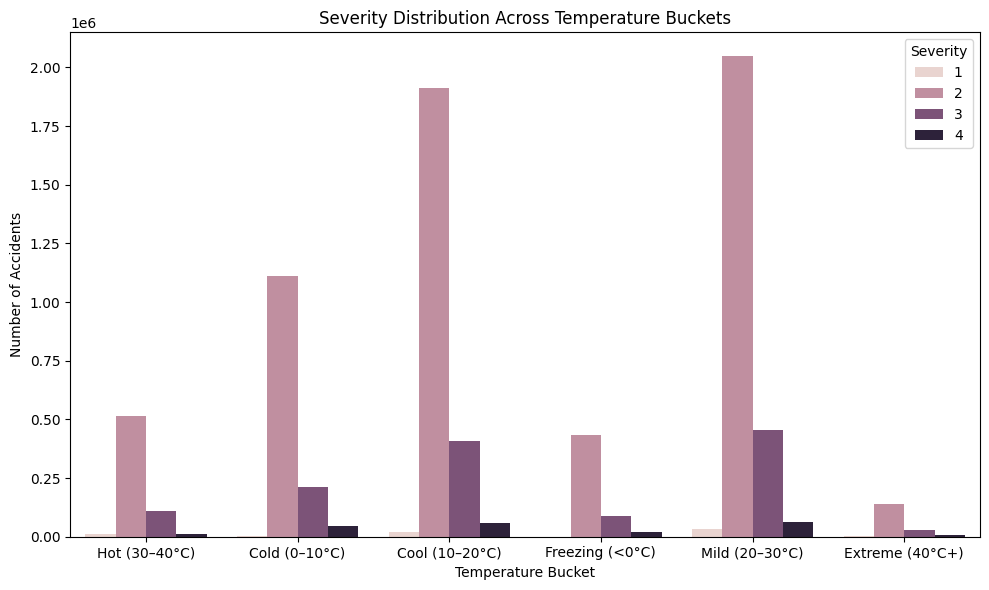

In [46]:
# Bucket temperatures
df = df.withColumn(
    "Temperature_Bucket",
    when(col("Temperature(C)") < 0, "Freezing (<0°C)")
    .when((col("Temperature(C)") >= 0) & (col("Temperature(C)") < 10), "Cold (0–10°C)")
    .when((col("Temperature(C)") >= 10) & (col("Temperature(C)") < 20), "Cool (10–20°C)")
    .when((col("Temperature(C)") >= 20) & (col("Temperature(C)") < 30), "Mild (20–30°C)")
    .when((col("Temperature(C)") >= 30) & (col("Temperature(C)") < 40), "Hot (30–40°C)")
    .otherwise("Extreme (40°C+)")
)

# Aggregate severity per bucket
severity_dist = df.groupBy("Temperature_Bucket", "Severity").count().toPandas()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=severity_dist, x="Temperature_Bucket", y="count", hue="Severity")
plt.title("Severity Distribution Across Temperature Buckets")
plt.xlabel("Temperature Bucket")
plt.ylabel("Number of Accidents")
plt.tight_layout()

plt.show()


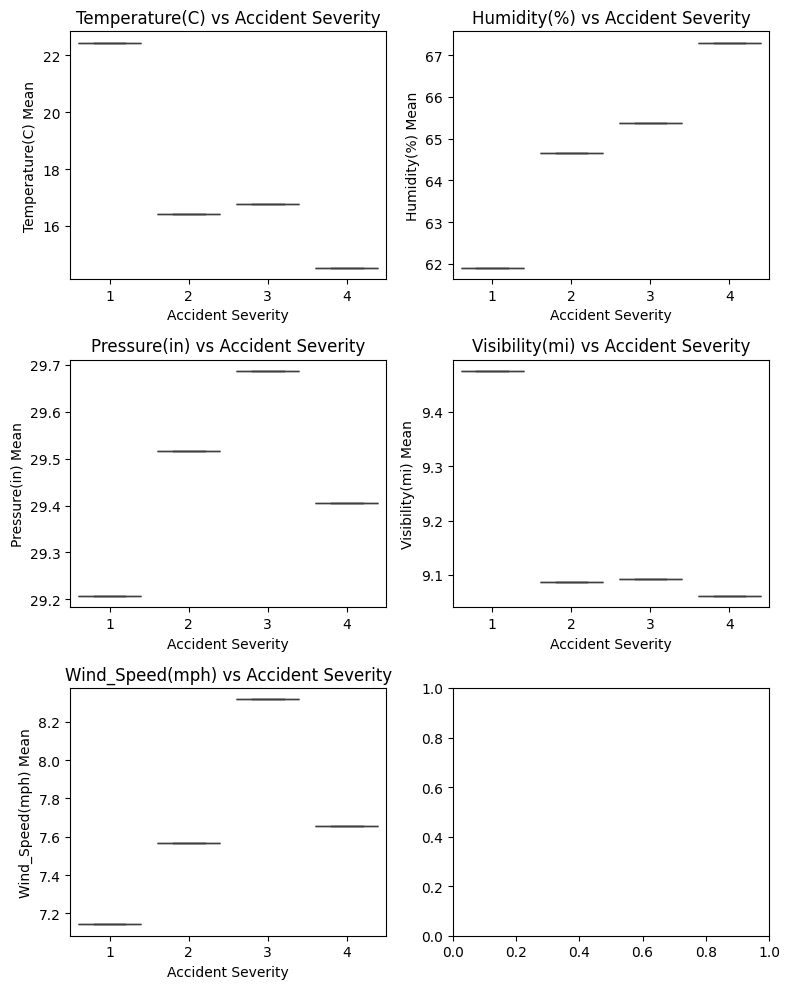

In [47]:
# List of weather factors
weather_factors = ['Temperature(C)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']

# Creating subplots
fig, axes = plt.subplots(3, 2, figsize=(8, 10))
axes = axes.flatten()

# Loop over each weather factor
for i, factor in enumerate(weather_factors):
    # Group by severity and calculate summary statistics (mean, min, max, stddev)
    factor_data = df.groupBy("Severity").agg(
        F.mean(factor).alias(f"{factor}_mean"),
        F.min(factor).alias(f"{factor}_min"),
        F.max(factor).alias(f"{factor}_max"),
        F.stddev(factor).alias(f"{factor}_stddev")
    )
    
    # Convert the aggregated data to Pandas for plotting (smaller dataset, faster)
    factor_data_pd = factor_data.toPandas()
    
    # Plot the boxplot for each weather factor and severity
    sns.boxplot(x='Severity', y=f'{factor}_mean', data=factor_data_pd, ax=axes[i])
    axes[i].set_title(f'{factor} vs Accident Severity')
    axes[i].set_xlabel('Accident Severity')
    axes[i].set_ylabel(f'{factor} Mean')

# Layout adjustment for better visualization
plt.tight_layout()

plt.show()

### 🌡️ Weather's Whisper on Accident Severity:

1.  **Cooler Temperatures, Higher Stakes?**:
    - The data suggests that accidents occurring at **lower temperatures** tend to be associated with **greater severity**.
    - Could icy conditions or other cold-weather hazards be playing a significant role in the seriousness of these incidents?

2.  **Humidity's Heavy Hand**:
    - Accidents happening with **higher humidity levels** appear to correlate with **increased severity**.
    - Perhaps rain or other moisture-related factors contribute to more impactful collisions.

3.  **Pressure's Subtle Story**:
    - The relationship between **air pressure** and accident severity seems less pronounced, showing only minor fluctuations across the severity levels.
    - This might indicate that pressure itself is not a primary driver of severity, or its influence is more complex.

4.  **Visibility's Vital Role**:
    - **Lower visibility** is strongly linked to **more severe accidents**.
    - This underscores the critical impact of clear sight on road safety and the potential dangers of driving in compromised visual conditions.

In [48]:
# Define weather-related features
weather_features = [
    'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 
    'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)'
]

# Drop rows with missing values in relevant columns
df = df.dropna(subset=weather_features)

# Assemble features into a single vector column
assembler = VectorAssembler(inputCols=weather_features, outputCol="features_raw")
df = assembler.transform(df)

# Scale features for KMeans clustering
scaler = StandardScaler(inputCol="features_raw", outputCol="features_scaled", withStd=True, withMean=True)
scaler_model = scaler.fit(df)
df = scaler_model.transform(df)

# Train KMeans model with k=4 (or any desired number of clusters)
kmeans = KMeans(featuresCol="features_scaled", k=4, seed=42)
model = kmeans.fit(df)

# Assign cluster labels to the data
clustered_df = model.transform(df)

# Show the first few rows with cluster assignments
clustered_df.select("features_scaled", "prediction").show(5)

+--------------------+----------+
|     features_scaled|prediction|
+--------------------+----------+
|[-1.2203062221538...|         1|
|[-1.2463250589988...|         1|
|[-1.2463250589988...|         1|
|[-1.2463250589988...|         1|
|[-1.4336606842832...|         1|
+--------------------+----------+
only showing top 5 rows



In [49]:
clustered_df.groupBy("prediction").agg(*[F.avg(col).alias(f"avg_{col}") for col in weather_features]).show()

clustered_df.groupBy("prediction").agg(F.avg("Severity").alias("avg_severity")).show()


+----------+------------------+------------------+------------------+-----------------+------------------+-------------------+---------------------+
|prediction|avg_Temperature(F)| avg_Wind_Chill(F)|   avg_Humidity(%)| avg_Pressure(in)|avg_Visibility(mi)|avg_Wind_Speed(mph)|avg_Precipitation(in)|
+----------+------------------+------------------+------------------+-----------------+------------------+-------------------+---------------------+
|         1| 44.14621015931413| 41.03849524061764| 79.07526353383055|29.54247937822547| 7.709724402182004|  6.534608279592046| 0.013799110450290173|
|         0|  73.6110664652578| 73.58784608589653| 56.82323224123472|29.59112301127222| 9.849646241161164|   7.85224625116755| 0.001389273884362...|
|         3|              45.5|42.333333333333336|              85.0|            29.55| 8.666666666666666|                5.5|                26.24|
|         2| 49.05709553664015|46.148671178516075|52.960177493761705|25.43199856363438|  9.19773156816691|

In [50]:
from pyspark.ml.evaluation import ClusteringEvaluator

evaluator = ClusteringEvaluator(featuresCol='features_scaled', metricName='silhouette', distanceMeasure='squaredEuclidean')
silhouette = evaluator.evaluate(clustered_df)
print(f"Silhouette Score = {silhouette}")


Silhouette Score = 0.4125639424648403


In [51]:
from pyspark.ml.feature import PCA

pca = PCA(k=2, inputCol="features_scaled", outputCol="pca_features")
# Step 1: Perform PCA on the same DataFrame used for clustering
pca_model = pca.fit(clustered_df)
pca_df = pca_model.transform(clustered_df)

# Step 2: Select the PCA features and prediction
plot_df = pca_df.select("pca_features", "prediction").toPandas()

# Step 3: Expand the PCA vector into two columns for plotting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plot_df[['pca1', 'pca2']] = pd.DataFrame(plot_df['pca_features'].tolist(), index=plot_df.index)

# Step 4: Plot
sns.scatterplot(data=plot_df, x="pca1", y="pca2", hue="prediction", palette="tab10")
plt.title("PCA Projection of Weather Clusters")
plt.show()



Py4JJavaError: An error occurred while calling o1606.collectToPython.
: java.lang.OutOfMemoryError: Java heap space


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot average severity by cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=severity_analysis_pd, x="prediction", y="avg_severity", palette="coolwarm")
plt.title('Average Accident Severity by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Severity')
plt.show()

NameError: name 'severity_analysis_pd' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
import numpy as np
cluster_analysis_pd = clustered_df.toPandas()
# Normalize cluster characteristics for radar chart
radar_data = cluster_analysis_pd.drop(columns=["prediction", "count"])
radar_data_normalized = (radar_data - radar_data.min()) / (radar_data.max() - radar_data.min())

# Create radar chart
labels = radar_data.columns
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Close the loop

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, row in radar_data_normalized.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1]  # Close the loop
    ax.plot(angles, values, label=f"Cluster {i}")
    ax.fill(angles, values, alpha=0.25)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title('Weather Profiles by Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "C:\Users\Ahmed Osama\AppData\Roaming\Python\Python313\site-packages\IPython\core\interactiveshell.py", line 3549, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
    ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Ahmed Osama\AppData\Local\Temp\ipykernel_11908\3802018351.py", line 2, in <module>
    cluster_analysis_pd = clustered_df.toPandas()
  File "c:\Users\Ahmed Osama\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyspark\sql\pandas\conversion.py", line 202, in toPandas
    rows = self.collect()
  File "c:\Users\Ahmed Osama\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyspark\sql\dataframe.py", line 1263, in collect
    sock_info = self._jdf.collectToPython()
  File "c:\Users\Ahmed Osama\AppData\Local\Programs\Python\Python313\Lib\site-packages\py4j\java_gateway.py", line 1322, in __call__
    return_value = get_return_value(
        a

ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it